In [20]:
import numpy as np
from ground.base import get_context
context = get_context()
Point, Segment = context.point_cls, context.segment_cls
from bentley_ottmann.planar import segments_intersect
from tqdm.notebook import tqdm
import matplotlib.pylab as plt
from matplotlib import collections  as mc

In [38]:
class LineSegmentSampling2D:
    """
    A class to generate line segments in a rectangular domain of
    size lx, ly
    """

    def __init__(self, min_length, max_length, lx, ly):
        self.lx = lx
        self.ly = ly
        self.min_length = min_length
        self.max_length = max_length

    def generateLine(self):

        r = np.random.uniform(self.min_length, self.max_length)
        x1 = np.random.uniform(r, self.lx - r)
        y1 = np.random.uniform(r, self.ly - r)

        a = np.random.rand() * 2 * np.pi


        x2 = r * np.cos(a) + x1

        if x2 > self.lx:
            x2 = self.lx
        elif x2 < 0:
            x2 = 0

        y2 = r * np.sin(a) + y1
        
        if y2 > self.ly:
            y2 = self.ly
        elif y2 < 0:
            y2 = 0

        line_seg = Segment(Point(x1, y1), Point(x2, y2))

        return line_seg

    def generate_N_lines(self, N):
        lines = []
        for i in range(N):
            lines.append(self.generateLine())
        return lines

    def generate_N_non_intersecting_lines(self, N):
        lines = []
        pbar = tqdm(total = N)
        while len(lines) < N:
            lines.append(self.generateLine())
            if (segments_intersect(lines)):
                lines = lines[:-1]
            else: 
                pbar.update(1)


        return lines



  0%|          | 0/300 [00:00<?, ?it/s]

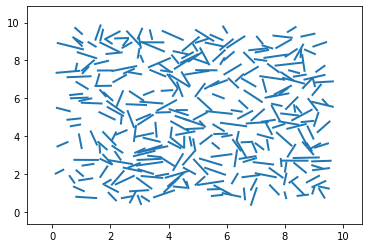

In [51]:
sampler = LineSegmentSampling2D(0.4, 1, 10, 10)

lines = sampler.generate_N_non_intersecting_lines(300)
lines_array = [[(i.start.x, i.start.y), (i.end.x, i.end.y)] for i in lines] 

lc = mc.LineCollection(lines_array, linewidths=2)
fig, ax = plt.subplots()
ax.add_collection(lc)
ax.margins(0.1)

In [15]:
lines_array[0]

[(3.742849271238672, 3.6530789282996556),
 (4.61212400357231, 3.158749645608167)]